# A/B Testing: Marketing Campaign Optimization
**Cel biznesowy:** Analiza testu A/B dla dwóch kampanii reklamowych (Control vs. Test). Celem jest sprawdzenie statystycznej istotności różnic we wskaźnikach klikalności (CTR) oraz współczynniku konwersji (Conversion Rate).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

df_control = pd.read_csv("data/control_group.csv", sep=";")
df_test = pd.read_csv("data/test_group.csv", sep=";")

columns_names = ["Campaign Name", "Date", "Spend", "Impressions", "Reach", 
                 "Website Clicks", "Searches", "View Content", "Add to Cart", "Purchases"]

df_control.columns = columns_names
df_test.columns = columns_names

df = pd.concat([df_control, df_test], ignore_index=True)

display(df.head())

,Campaign Name,Date,Spend,Impressions,Reach,Website Clicks,Searches,View Content,Add to Cart,Purchases
0,Control Campaign,1.08.2019,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0
1,Control Campaign,2.08.2019,1757,121040.0,102513.0,8110.0,2033.0,1841.0,1219.0,511.0
2,Control Campaign,3.08.2019,2343,131711.0,110862.0,6508.0,1737.0,1549.0,1134.0,372.0
3,Control Campaign,4.08.2019,1940,72878.0,61235.0,3065.0,1042.0,982.0,1183.0,340.0
4,Control Campaign,5.08.2019,1835,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
for col in df.columns[2:]:
    df[col] = df.groupby("Campaign Name")[col].transform(lambda x: x.fillna(x.mean()))

print("Braki po czyszczeniu:", df.isnull().sum().sum())

Braki po czyszczeniu: 0


,CTR (%),Conversion Rate (%)
Campaign Name,,
Control Campaign,4.856521,9.825473
Test Campaign,8.087886,8.640659


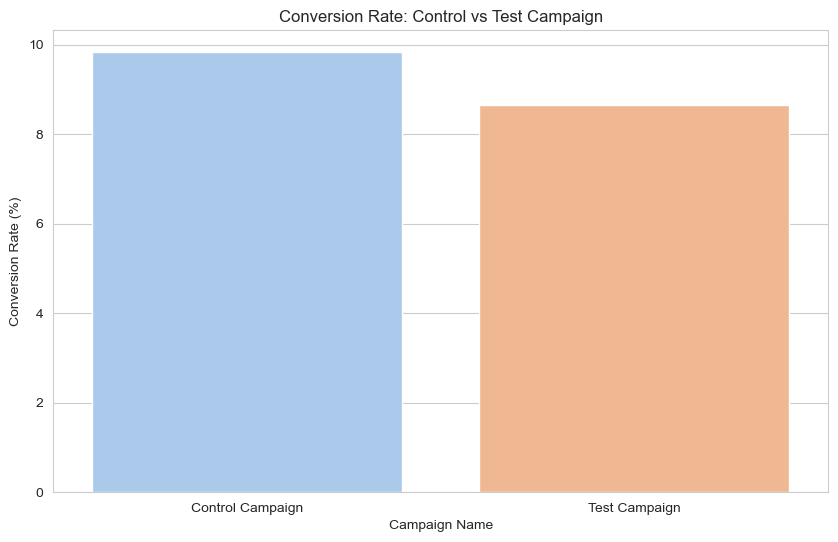

In [3]:
campaign_summary = df.groupby("Campaign Name")[["Impressions", "Website Clicks", "Purchases"]].sum()

campaign_summary["CTR (%)"] = (campaign_summary["Website Clicks"] / campaign_summary["Impressions"]) * 100
campaign_summary["Conversion Rate (%)"] = (campaign_summary["Purchases"] / campaign_summary["Website Clicks"]) * 100

display(campaign_summary[["CTR (%)", "Conversion Rate (%)"]])

sns.barplot(x=campaign_summary.index, y=campaign_summary["Conversion Rate (%)"], palette="pastel", hue=campaign_summary.index, legend=False)
plt.title("Conversion Rate: Control vs Test Campaign")
plt.ylabel("Conversion Rate (%)")
plt.show()

In [4]:
contingency_table = [
    [campaign_summary.loc["Control Campaign", "Purchases"], 
     campaign_summary.loc["Control Campaign", "Website Clicks"] - campaign_summary.loc["Control Campaign", "Purchases"]],
    
    [campaign_summary.loc["Test Campaign", "Purchases"], 
     campaign_summary.loc["Test Campaign", "Website Clicks"] - campaign_summary.loc["Test Campaign", "Purchases"]]
]
chi2, p_val, dof, expected = chi2_contingency(contingency_table)

print(f"P-value: {p_val}")

if p_val < 0.05:
    print("Roznica jest istotna statystycznie.")
else:
    print("Brak istotnych statystycznie roznic.")

P-value: 7.788956793238821e-33
Roznica jest istotna statystycznie.


## Rekomendacje Biznesowe i Wyniki Testu A/B

1. **Analiza Konwersji (Zakupy):** Kampania kontrolna (Control) osiąga wyższy współczynnik konwersji (9.83%) w porównaniu do nowej kampanii testowej (8.64%). Test statystyczny Chi-kwadrat (p-value bliskie zeru) potwierdza, że ta różnica nie jest przypadkowa.
2. **Analiza Ruchu (CTR):** Choć kampania testowa generuje gorszą konwersję sprzedażową, jej wskaźnik klikalności (CTR) wynosi aż 8.09% w zestawieniu z zaledwie 4.86% dla kampanii kontrolnej. 
3. **Rekomendacja:** Nowa kampania (Test) znakomicie przyciąga uwagę i generuje ogromny ruch na stronie. Jednak ruch ten jest gorszej jakości – użytkownicy rzadziej dokonują zakupów. Z biznesowego punktu widzenia na ten moment bezpieczniej jest pozostać przy kampanii kontrolnej w celu maksymalizacji konwersji.